<a href="https://colab.research.google.com/github/tusharhanda/lab/blob/master/Day_01_Introduction_to_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This workbook contains Day 1 of studying Coursera's *Tensorflow in Practice* course. It is divided into following x sections:

01. Predicting linear relationship between two numbers
02. Simple Image Recognition using Fashion MNIST data
03. Predict Hand Written Digits using MNIST data



## **01. Predict linear relationship between two numbers**


This model predicts y based on given x values. It is a very simple neural network to understand linear relationship between two given numbers.

In [0]:
import tensorflow as tf
import numpy as np #Numpy helps represent our data as lists easily and quickly

This model uses only 1 layer that has 1 neuron and the input shape to it is just 1 value.

In [0]:
#Keras is a framework that helps define our neural network as a set of sequential layers
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])]) 

To compile our model we need to define LOSS and OPTIMIZER:


*   **LOSS:** Measures the guessed answers against the known correct answers and measures how well or badly it did. Here we use *Mean Squared Error* for loss
*   **OPTIMIZER:** It tries to minimize the loss by making better guesses. Here we use *Stochastic Gradient Descent* as our optimizer

Also, this process repeats n number of times where n is **EPOCH**


In [0]:
model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['accuracy']) #adding metrics to see the accuracy of the model

Data used here is in the form of Numpy array


In [0]:
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

We then fit the model with the data and here we provide the number of EPOCHs

In [14]:
model.fit(xs, ys, epochs=500)

Train on 6 samples
Epoch 1/500
6/6 [==============================] - 0s 6ms/sample - loss: 4.4833e-05 - acc: 0.1667
Epoch 2/500
6/6 [==============================] - 0s 206us/sample - loss: 4.3912e-05 - acc: 0.1667
Epoch 3/500
6/6 [==============================] - 0s 207us/sample - loss: 4.3010e-05 - acc: 0.1667
Epoch 4/500
6/6 [==============================] - 0s 221us/sample - loss: 4.2127e-05 - acc: 0.1667
Epoch 5/500
6/6 [==============================] - 0s 204us/sample - loss: 4.1261e-05 - acc: 0.1667
Epoch 6/500
6/6 [==============================] - 0s 218us/sample - loss: 4.0414e-05 - acc: 0.1667
Epoch 7/500
6/6 [==============================] - 0s 181us/sample - loss: 3.9583e-05 - acc: 0.1667
Epoch 8/500
6/6 [==============================] - 0s 342us/sample - loss: 3.8769e-05 - acc: 0.1667
Epoch 9/500
6/6 [==============================] - 0s 646us/sample - loss: 3.7973e-05 - acc: 0.1667
Epoch 10/500
6/6 [==============================] - 0s 239us/sample - loss: 3.7194e

This model has now learned how x and y are related. We can now use it to predict Y for a known X value and print the results

In [15]:
print(model.predict(([10.0])))

[[18.999887]]


## **02. Simple Image Recognition using Fashion MNIST data**

Recognize 10 different items of clothing using Fashion MNIST data

In [22]:
import tensorflow as tf
print(tf.__version__)
import matplotlib.pyplot as plt

1.15.0


In [0]:
mnist = tf.keras.datasets.fashion_mnist #Fashion MNIST data is available in tf.keras API

In [19]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data() #Split into train and test data

4423680/4422102 [==============================] - 0s 0us/step


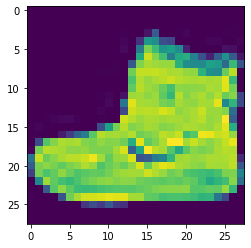

In [23]:
plt.imshow(training_images[0]) #print the training image

In [26]:
print(training_labels[0]) #Label of image

9


In [28]:
print(training_images[0]) #Print the image itself in pixels 0 to 255

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [30]:
#Normalize the values from 0 to 255 -> 0 to 1 so that it's easier for the NN to understand 
training_images = training_images/255.0
test_images = test_images/255.0
print(training_images[0])

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00

Create a model (Sequence of layers) with three layers:
1.   Layer 1: Takes in the input data as a flattened ( one dimensional set which is created using the square of values in the image)
2.   Layer 2: Create a layer of 128 neurons using Dense. It uses an activation function called **Relu** ( Relu means that if x>0, return x, otherwise return 0)
3.   Layer 3: Create the output layer should have the same number of neurons as the number of labels. Here it is 10. It uses the activation function called **Softmax** ( Softmax takes a set of values and picks the one that is biggest )



In [0]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation = tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation = tf.nn.softmax)])

In [0]:
model.compile(optimizer = tf.train.AdamOptimizer(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [38]:
model.fit(training_images, training_labels, epochs = 5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 69us/sample - loss: 1.0648 - acc: 0.6697
Epoch 2/5
60000/60000 [==============================] - 4s 67us/sample - loss: 0.6297 - acc: 0.7737
Epoch 3/5
60000/60000 [==============================] - 4s 67us/sample - loss: 0.5557 - acc: 0.8022
Epoch 4/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.5144 - acc: 0.8172
Epoch 5/5
60000/60000 [==============================] - 4s 65us/sample - loss: 0.4875 - acc: 0.8277


In [39]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 38us/sample - loss: 0.5027 - acc: 0.8211


[0.50267992105484, 0.8211]

We can also define **Callbacks** i.e. the model will stop training as soon as it reaches our expected accuracy. We need to write a class for it.

In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.86):
      print("\nReached 86% accuracy so cancelling training!")
      self.model.stop_training = True

In [0]:
callbacks = myCallback()

In [50]:
model.fit(training_images, training_labels, epochs = 10, callbacks= [callbacks])

Train on 60000 samples
Epoch 1/10
59424/60000 [============================>.] - ETA: 0s - loss: 0.3856 - acc: 0.8648
Reached 86% accuracy so cancelling training!
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3852 - acc: 0.8648


## **03. Predict Hand Written Digits using MNIST data**

This model uses MNIST data to predict hand-written digits

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [0]:
mnist = tf.keras.datasets.mnist
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

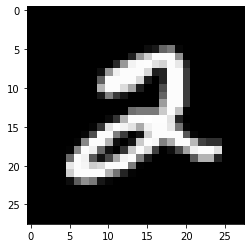

In [75]:
pixels = train_data[5].reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

In [66]:
print(train_labels[5])


2


In [0]:
train_data = train_data/255.0
test_data = test_data/255.0

In [0]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
                                    tf.keras.layers.Dense(512, activation = tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation = tf.nn.softmax)])

In [0]:
model.compile(optimizer = tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.90):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

In [0]:
callbacks = myCallback()

In [81]:
model.fit(train_data, train_labels, epochs = 10, callbacks= [callbacks])

Train on 60000 samples
Epoch 1/10
59680/60000 [============================>.] - ETA: 0s - loss: 0.2036 - acc: 0.9393
Reached 90% accuracy so cancelling training!
60000/60000 [==============================] - 7s 121us/sample - loss: 0.2029 - acc: 0.9395


In [82]:
model.evaluate(test_data, test_labels)

10000/10000 [==============================] - 1s 61us/sample - loss: 0.1086 - acc: 0.9670


[0.10861083717383445, 0.967]